<a href="https://colab.research.google.com/github/discacciati/inteligencia-artificial-aa/blob/master/atividade-ativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn import datasets  #import datasets from sklearn
import pandas as pd  # package for data processing, CSV file I/O library
import numpy as np   # package for linear algebra
import warnings      # a current version of seaborn generates a bunch of warnings that we'll ignore 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns  #package with a Python graphing library
from sklearn.tree import DecisionTreeClassifier  #package to assemble the classification tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
plt.style.use('ggplot')


**Above** are the imports of the packages and libraries that will be used

In [6]:
#We'll load the Iris flower dataset
iris = datasets.load_iris()

#print iris data keys
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'data',
 'descr',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_cir

**Iris**(plant) is a genus of 260–300 species of flowering plants with showy flowers. It takes its name from the Greek word for a rainbow, which is also the name for the Greek goddess of the rainbow, Iris.

**Sepals**
Protective parts of the flower, external to the petals, often green, that form the calyx. They are foliate structures, normally smaller and more consistent than the petals, and in most cases they have the primary function of protecting the floral bud, closing over it before anthesis.

In [9]:
#Visualizando dados de iris
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [10]:
#Tipos de dados 
type(iris)


sklearn.utils.Bunch

In [11]:
#Tipo de variáveis
type("a")

str

In [8]:
#print the iris data target_name
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
#print the iris Description
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [17]:
#print iris.target_names 
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


In [14]:
#print the type of iris.taget_names
print(type(iris.target_names))

<class 'numpy.ndarray'>


In [18]:
#checking the features_names
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [19]:
# checking the type of iris.data and iris.target
type(iris.data),type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [20]:
#Checking the number of rows and columns of the iris.dataset
iris.data.shape

(150, 4)

In [21]:
#Checking the contents of the dataset. These data will be used to train the algorithm.
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [24]:
#Preparing data for training
X = iris.data
y = iris.target
z = iris.target_names[0]
w = iris.target_names[1]
q = iris.target_names[2]
print(z)
print(w)
print(q)

setosa
versicolor
virginica


iris.target_names at position [0] refers to setosa



iris.target_names at position [1] refers to versicolor

iris.target_names at position [2] refers to virginica

In [28]:
#Creating a dataframe with pandas to start training the data
df = pd.DataFrame(X,columns=iris.feature_names)

In [29]:
#viewing the first lines of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe281885bd0>,
      dtype=object)

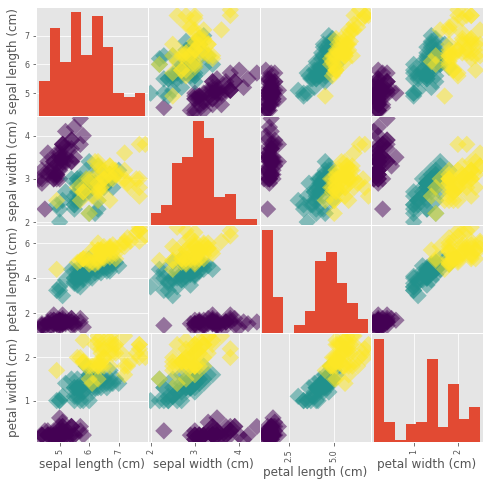

In [33]:
#Assembling a matrix to visualize the correlation between the variables
pd.plotting.scatter_matrix(df,c=y,figsize=[8,8],s=150,marker='D')

In [ ]:
#Starting the classification process according to the characteristics of each flower

![Classificação da imagem](http://computacaointeligente.com.br/assets/img/posts/classificacao-dados/iris-exemplo.png)



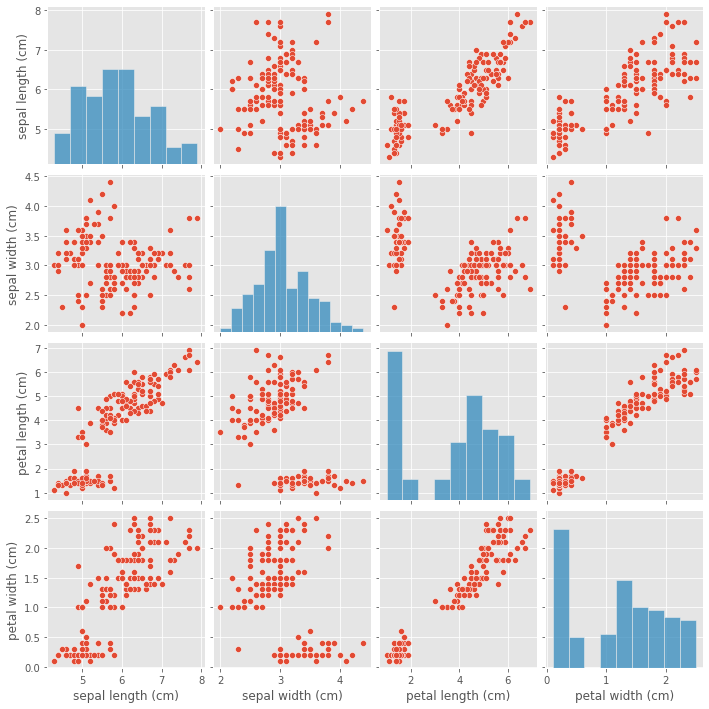

In [34]:
#Classifier Knn
graph = sns.pairplot(df)

In [36]:
knn = KNeighborsClassifier(n_neighbors=6)

In [37]:
#filters by types

In [39]:
#Create 3 lists to store the filtered data
filter_setosa = [] 
filter_versicolor = [] 
filter_virginica = [] 

In [43]:
#the filters interated in a for...in statement
for item in iris['target_names']:
     
    if item == 0:
        filter_setosa.append(item)
    if item == 1:
        filter_versicolor.append(item)
    if item == 2:
        filter_virginica.append(item)

In [44]:
print(filter_setosa)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [45]:
print(filter_versicolor)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [46]:
print(filter_virginica)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
